# EP02.1 da disciplina de Visão e Processamento de Imagens
## (MAC5768/MAC0417 -- 2020)

|Nomes:                        | N° USP:|
|------------------------------|--------|
|Alana Ilen Cermak             | 10737967|
|Francisco Edvar da Cunha Filho | 10656115|
|Marcos Markevich              | 11373435|

- Link para pasta no drive: https://drive.google.com/drive/folders/1Qc0gAhNhfqMOcWeW5aDH7WcEgftJjq12?usp=sharing

- Link para o github do grupo: https://github.com/franciscoedvar/EPs_Visao_Computacional



O trabalho que segue é uma composição de base de dados com 4440 imagens, realizado como EP2.1 da matéria MAC0417/5768 - Visão e Processamento de Imagens, ministrada pelo professor Roberto Marcondes Cesar Junior, IME-USP. As imagens correspondem a 5 versões de 10 classes diferentes de objetos cotidianos, sendo elas: níveis de cinza, soma de fundo com gradiente de níveis de cinza, filtro logaritmo, filtro exponencial, filtro da média. O programa faz um apêndice das fotos e gera uma tabela mnist aleatória por versão, com a nossa base de dados. 

In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd
from skimage.filters.edges import convolve
from skimage.io import imread, imsave
from skimage.util import img_as_ubyte
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import exposure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import csv
import os

import warnings
warnings.filterwarnings("ignore")

Drive contendo o dados.zip, usado a seguir:

 * https://drive.google.com/file/d/1OoGOJ84MAC454rX72lpKmpJXXC2Y4FCB/view?usp=sharing

In [2]:
#Utilização da biblioteca Google Drive Downloader para baixar e extrair os dados do EP01.
gdd.download_file_from_google_drive(file_id='1OoGOJ84MAC454rX72lpKmpJXXC2Y4FCB',
                                    dest_path='./dados.zip',
                                    unzip=True,
                                    showsize=True)

#Localização dos arquivos
if os.path.split(os.getcwd())[-1] != 'Fotos_1280_720':
    os.chdir('./dados/Fotos_1280_720')
csv_path = "./../Dados Imagens.csv"
csv_file = pd.read_csv(csv_path)

In [3]:
# Plot de imagens formato mnist para imagens fornecidas 
def mnist_like_plot(img_per_row = 10, sample_size= 100, img_root = './',  **options):
  
    all_imgs = imgs_mnist(sample_size, img_root)
    imgs = all_imgs 
    num_img_per_row = min(len(imgs), img_per_row)
    num_rows = (len(imgs) - 1) // num_img_per_row + 1
    all_rows = []
    for i in range(num_rows):
        row = all_imgs[ i * num_img_per_row : (i + 1) * num_img_per_row]
        all_rows.append(np.concatenate(row, axis=1))
    img_grid = np.concatenate(all_rows, axis = 0)
    plt.figure(figsize=(15,25))
    plt.imshow(img_grid, **options)
    plt.axis('off')
    
    del img_grid
    return 

# Leitura das imagens no diretório fornecido 
def imgs_mnist(sample_size,root_dir = './'):
    all_imgs = [os.path.join(root, name)
                 for root, dirs, files in os.walk(root_dir)
                 for name in files
                 if name.endswith((".jpg"))] 
    all_imread = []
    all_imgs = random.sample(all_imgs, sample_size)
    for i in range(len(all_imgs)):
        all_imread.append(imread(root_dir+all_imgs[i]))

    return all_imread

# Identificação do path das imagens no diretório fornecido 
def read_imgs_data_ag(root_dir = './'):
    all_imgs = [os.path.join(root, name)
                 for root, dirs, files in os.walk(root_dir)
                 for name in files
                 if name.endswith((".jpg"))] 
    all_imread = []
    for i in range(len(all_imgs)):
        all_imread.append(all_imgs[i])
    return all_imread

# Converte a imagem, do path fornecido, para níveis de cinza e salva a imagem na pasta correspondente
def convert_2gray(img_path):
    img = imread(img_path)
    img_2gray = img_as_ubyte(rgb2gray(img))
    main_folder_name = "fotos_1280_720_grayscale/"
    main_folder_augmented = "fotos_1280_720_augmented/"
    folder_name = os.path.split(img_path)[0][2:]
    object_name = os.path.split(img_path)[1]
    if not os.path.exists("./../"+main_folder_name+folder_name):
        os.makedirs("./../"+main_folder_name+folder_name)
    if not os.path.exists("./../"+main_folder_augmented+folder_name):
        os.makedirs("./../"+main_folder_augmented+folder_name)
    imsave("./../"+main_folder_name+folder_name+'/'+object_name,img_2gray)
    imsave("./../"+main_folder_augmented+folder_name+'/gray_'+object_name,img_2gray)

    return

#Plot no formato mnist das imagens em níveis de cinza, se convert = true aplica a conversão.
def grayscale(plot = True, convert = False):
    if convert:
        data_ag = read_imgs_data_ag('./')
        for i in data_ag:
            convert_2gray(i)
    if plot:
        mnist_like_plot(img_root = './../fotos_1280_720_grayscale', cmap = 'gray')
    return

# Adiciona à imagem, do path fornecido, fundo com gradiente em níveis de cinza e salva a imagem na pasta correspondente
def add_gradient_background(img_path):
    img_gray = imread(img_path)
    img_gray = img_as_ubyte(img_gray)
    gradient_background = img_as_ubyte(np.tile(np.linspace(0, 1, 1280),(720,1)).T)
    img_grad =  np.ubyte(0.5*img_gray + 0.5*gradient_background)
    main_folder_name = "fotos_1280_720_augmented/"
    folder_name = os.path.split(img_path)[0][30:]
    object_name = os.path.split(img_path)[1]
    if not os.path.exists("./../"+main_folder_name+folder_name):
        os.makedirs("./../"+main_folder_name+folder_name)
    imsave("./../"+main_folder_name+folder_name+'/grad_'+object_name,img_grad)
    return

 
def gradient(convert = False):
    if convert:
        grad_imgs = read_imgs_data_ag('./../fotos_1280_720_grayscale')
        for i in grad_imgs:
            add_gradient_background(i)
    return

# Aplica na imagem, do path fornecido, filtro logaritmo e salva a imagem na pasta correspondente
def apply_log(img_path):
    img_gray = imread(img_path)
    img_gray = img_as_ubyte(img_gray)
    img_log =  exposure.adjust_log(img_gray, 1)
    main_folder_name = "fotos_1280_720_augmented/"
    folder_name = os.path.split(img_path)[0][30:]
    object_name = os.path.split(img_path)[1]
    if not os.path.exists("./../"+main_folder_name+folder_name):
        os.makedirs("./../"+main_folder_name+folder_name)
    imsave("./../"+main_folder_name+folder_name+'/log_'+object_name,img_log)
    return

# Se convert = true aplica-se o filtro logaritmo
def log(convert = False):
    if convert:
        grad_imgs = read_imgs_data_ag('./../fotos_1280_720_grayscale')
        for i in grad_imgs:
            apply_log(i)
    return

# Aplica na imagem, do path fornecido, filtro exponencial e salva a imagem na pasta correspondente
def apply_exp(img_path):
    img_gray = imread(img_path)
    img_gray = img_as_ubyte(img_gray)
    img_exp =  exposure.adjust_gamma(img_gray,gamma = 0.7)
    main_folder_name = "fotos_1280_720_augmented/"
    folder_name = os.path.split(img_path)[0][30:]
    object_name = os.path.split(img_path)[1]
    if not os.path.exists("./../"+main_folder_name+folder_name):
        os.makedirs("./../"+main_folder_name+folder_name)
    imsave("./../"+main_folder_name+folder_name+'/exp_'+object_name,img_exp)
    return

# Se convert = true aplica-se o filtro exponencial
def exp(convert = False):
    if convert:
        grad_imgs = read_imgs_data_ag('./../fotos_1280_720_grayscale')
        for i in grad_imgs:
            apply_exp(i)
    return

# Aplica na imagem, do path fornecido, filtro da média e salva a imagem na pasta correspondente
def apply_mean_filter(img_path):
    img_gray = imread(img_path)
    img_gray = img_as_ubyte(img_gray)
    kernel_conv = [[1./9,1./9,1./9],[1./9,1./9,1./9],[1./9,1./9,1./9]]
    img_conv = convolve(img_gray, kernel_conv, output=None, mode='reflect', cval=0.0, origin=0)
    main_folder_name = "fotos_1280_720_augmented/"
    folder_name = os.path.split(img_path)[0][30:]
    object_name = os.path.split(img_path)[1]
    if not os.path.exists("./../"+main_folder_name+folder_name):
        os.makedirs("./../"+main_folder_name+folder_name)
    imsave("./../"+main_folder_name+folder_name+'/mean_'+object_name,img_conv)
    return

# Se convert = true aplica-se o filtro da média
def mean_filter(convert = False):
    if convert:
        grad_imgs = read_imgs_data_ag('./../fotos_1280_720_grayscale')
        for i in grad_imgs:
            apply_mean_filter(i)
    return

# Plot do dataset augmented, se convert_all = True gera as imagens transformadas
def data_augmented(convert_all = False):
    gradient(convert = convert_all)
    log(convert = convert_all)
    exp(convert = convert_all)
    mean_filter(convert = convert_all)
    mnist_like_plot(img_root = './../fotos_1280_720_augmented', cmap = 'gray')
    return

## Criação Imagens em níveis de cinza 

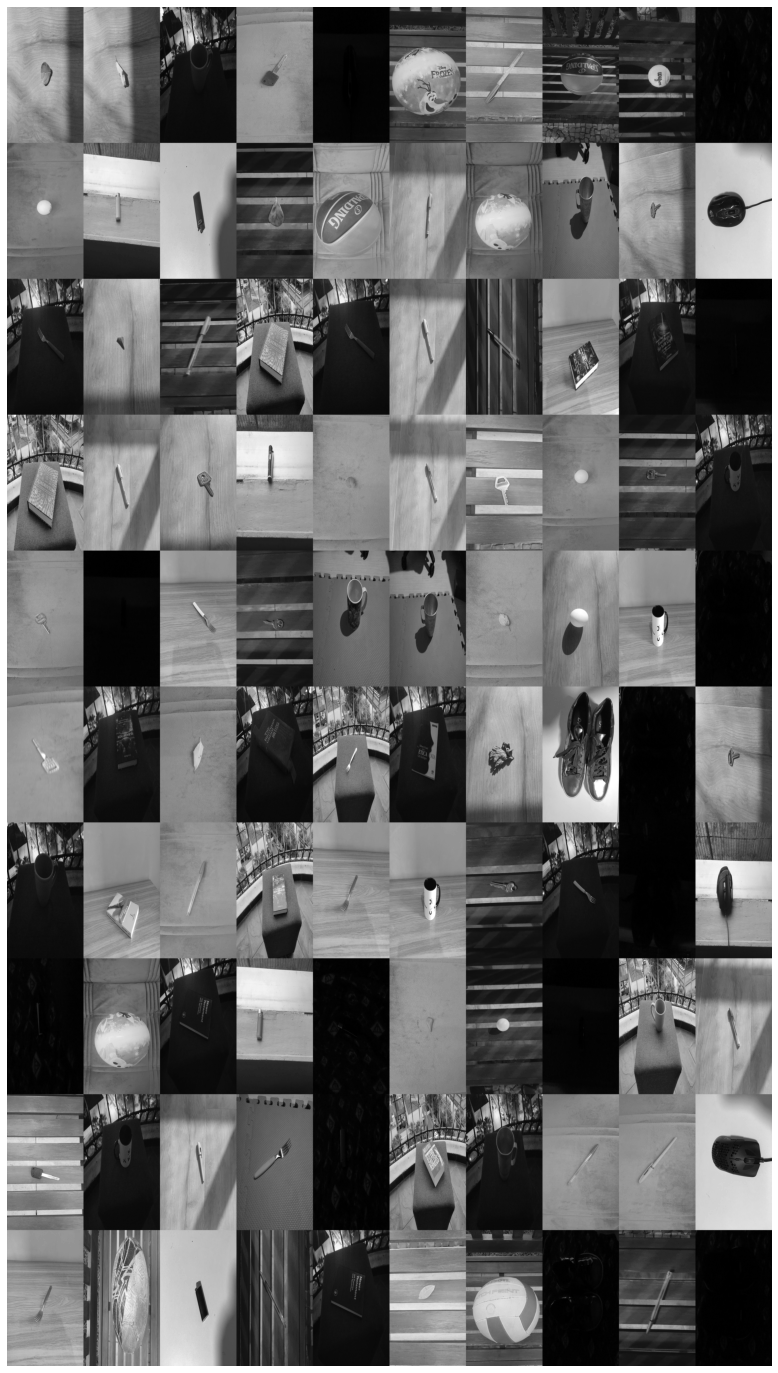

In [4]:
# Plot do dataset grayscale, se convert = True gera imagens em níveis de cinza 
grayscale(convert = True)

## Geração do dataset augmented
### Fundo gradiente em níveis de cinza, Filtro logaritmo, Filtro exponencial, Filtro da média

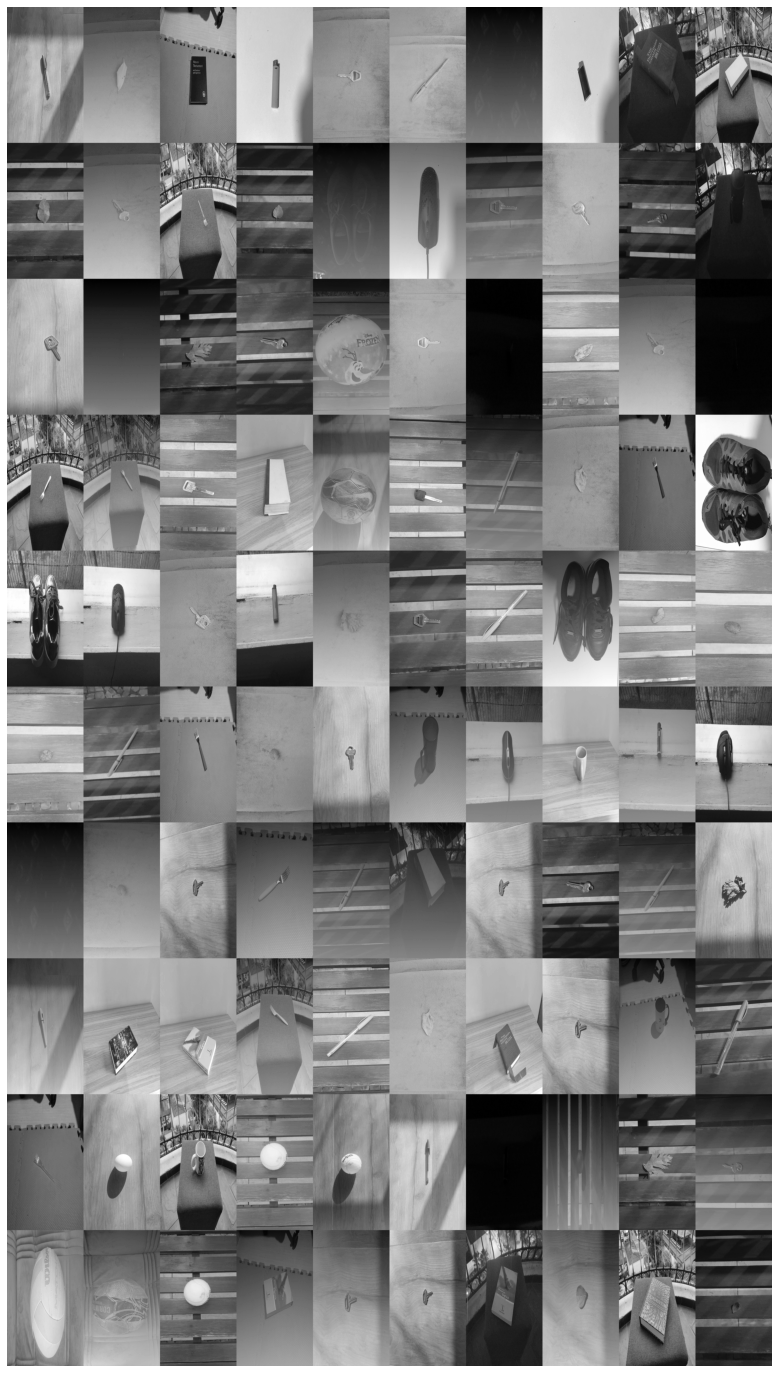

In [5]:
# Plot do dataset augmented, se convert_all = True gera todas as imagens transformadas
data_augmented(convert_all = True)